# Importing the essential libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the files (AM.CSV)

In [2]:
df = pd.read_csv('AM.csv')
df.head()

,order_id,product,quantity,price,address,month,day,month_,year,hour,tot_amt,shop_no,street,city,city_code,pincode,time_
0,236677,20in Monitor,1,109.99,"918 6th St, San Francisco, CA 94016",August,13,8,2019,7,109.99,918,6th St,San Francisco,CA,94016,A.M.
1,236682,AA Batteries (4-pack),1,3.84,"118 Johnson St, Portland, OR 97035",August,19,8,2019,12,3.84,118,Johnson St,Portland,OR,97035,A.M.
2,236687,USB-C Charging Cable,1,11.95,"668 Meadow St, New York City, NY 10001",August,23,8,2019,12,11.95,668,Meadow St,New York City,NY,10001,A.M.
3,236689,AAA Batteries (4-pack),1,2.99,"13 Cedar St, San Francisco, CA 94016",August,21,8,2019,10,2.99,13,Cedar St,San Francisco,CA,94016,A.M.
4,236690,AAA Batteries (4-pack),1,2.99,"139 River St, San Francisco, CA 94016",August,8,8,2019,12,2.99,139,River St,San Francisco,CA,94016,A.M.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67948 entries, 0 to 67947
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   order_id   67948 non-null  int64  
 1   product    67948 non-null  object 
 2   quantity   67948 non-null  int64  
 3   price      67948 non-null  float64
 4   address    67948 non-null  object 
 5   month      67948 non-null  object 
 6   day        67948 non-null  int64  
 7   month_     67948 non-null  int64  
 8   year       67948 non-null  int64  
 9   hour       67948 non-null  int64  
 10  tot_amt    67948 non-null  float64
 11  shop_no    67948 non-null  int64  
 12  street     67948 non-null  object 
 13  city       67948 non-null  object 
 14  city_code  67948 non-null  object 
 15  pincode    67948 non-null  int64  
 16  time_      67948 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 8.8+ MB


In [4]:
df.describe()

,order_id,quantity,price,day,month_,year,hour,tot_amt,shop_no,pincode
count,67948.00000,67948.000000,67948.000000,67948.000000,67948.000000,67948.000000,67948.000000,67948.000000,67948.000000,67948.000000
mean,230263.93342,1.125890,183.367589,15.781141,7.046712,2019.000500,8.625773,184.473470,499.341761,63922.888312
std,51522.29619,0.447965,331.073278,8.753619,3.504184,0.022364,3.451435,331.333148,287.931027,37741.713404
min,141238.00000,1.000000,2.990000,1.000000,1.000000,2019.000000,0.000000,2.990000,1.000000,2215.000000
25%,185725.25000,1.000000,11.950000,8.000000,4.000000,2019.000000,7.000000,11.950000,250.000000,10001.000000
50%,230146.00000,1.000000,14.950000,16.000000,7.000000,2019.000000,10.000000,14.950000,498.000000,90001.000000
75%,274659.50000,1.000000,150.000000,23.000000,10.000000,2019.000000,11.000000,150.000000,749.000000,94016.000000
max,319669.00000,9.000000,1700.000000,31.000000,12.000000,2020.000000,12.000000,3400.000000,999.000000,98101.000000


In [5]:
df.isnull().sum()

order_id     0
product      0
quantity     0
price        0
address      0
month        0
day          0
month_       0
year         0
hour         0
tot_amt      0
shop_no      0
street       0
city         0
city_code    0
pincode      0
time_        0
dtype: int64

In [6]:
df.head()

,order_id,product,quantity,price,address,month,day,month_,year,hour,tot_amt,shop_no,street,city,city_code,pincode,time_
0,236677,20in Monitor,1,109.99,"918 6th St, San Francisco, CA 94016",August,13,8,2019,7,109.99,918,6th St,San Francisco,CA,94016,A.M.
1,236682,AA Batteries (4-pack),1,3.84,"118 Johnson St, Portland, OR 97035",August,19,8,2019,12,3.84,118,Johnson St,Portland,OR,97035,A.M.
2,236687,USB-C Charging Cable,1,11.95,"668 Meadow St, New York City, NY 10001",August,23,8,2019,12,11.95,668,Meadow St,New York City,NY,10001,A.M.
3,236689,AAA Batteries (4-pack),1,2.99,"13 Cedar St, San Francisco, CA 94016",August,21,8,2019,10,2.99,13,Cedar St,San Francisco,CA,94016,A.M.
4,236690,AAA Batteries (4-pack),1,2.99,"139 River St, San Francisco, CA 94016",August,8,8,2019,12,2.99,139,River St,San Francisco,CA,94016,A.M.


### Which pincode has the maximum orders (valid pincodes)

In [7]:
pins = []
for i in df['pincode'].unique():
    if len(str(i)) == 5 :                                  # check if the length of pincode is 5 
        pins.append(i)
        
        

orders_del = []
for pin in pins:
    c = 0
    for pincodes in df['pincode']:                          
        if pin == pincodes:                               # check if the pincodes is equal to unique pincode with length 5
            c += 1
    orders_del.append([pin,c])
    
    
orders = pd.DataFrame(orders_del,columns = ['pincode','order_count'])  # creating the dataframe
orders.sort_values(by = 'order_count',ascending = False)               # sorting the dataframe

,pincode,order_count
0,94016,16417
3,90001,10815
2,10001,9109
5,30301,5451
7,98101,5366
4,75001,5344
6,73301,3705
1,97035,3626


### Data visualization | Pincode sales | Pie Chart 

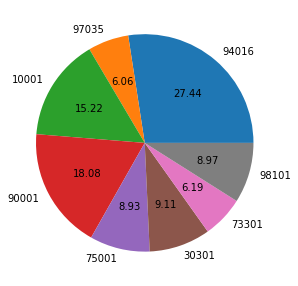

In [8]:
fig,axs = plt.subplots(figsize = (5,5))
plt.pie(orders['order_count'],labels = orders['pincode'],autopct = '%1.2f')
plt.show()

### Monthly Sales (monthly amount collected)

In [9]:
## Direct method                      ---- > (Data is structured)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# indirect method                     ----> (data is unstructured)
# for i in df['month'].unique():
#     months.append(i)
    
monthly = []
for month in months:
    c = 0 
    for i in df.values:
        if month == i[5]:
            c += i[10]
    monthly.append([month,round(c,2)])   

monthly_amount = pd.DataFrame(monthly,columns =['month','sales_amount'])
monthly_amount
    

,month,sales_amount
0,January,693942.59
1,February,758572.26
2,March,1016413.66
3,April,1277385.76
4,May,1165805.80
5,June,944818.30
6,July,945849.08
7,August,808356.80
8,September,738195.74
9,October,1384955.30


### Data visualization | Monthly sales | Pie Chart ,line Graph and Bar Graph

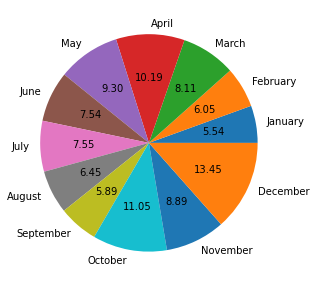

In [10]:
fig,axs = plt.subplots(figsize = (5,5))
plt.pie(monthly_amount['sales_amount'],labels = monthly_amount['month'],autopct = '%1.2f')
plt.show()

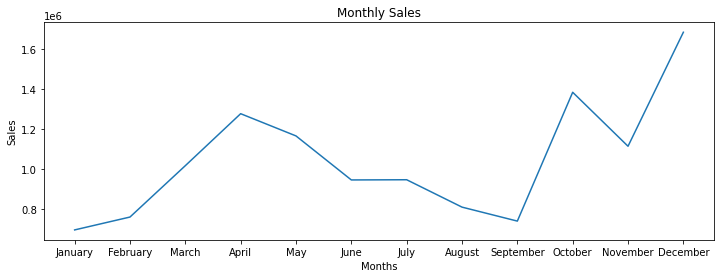

In [11]:
fig,axs = plt.subplots(figsize = (12,4))
plt.plot(monthly_amount['month'], monthly_amount['sales_amount'])
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

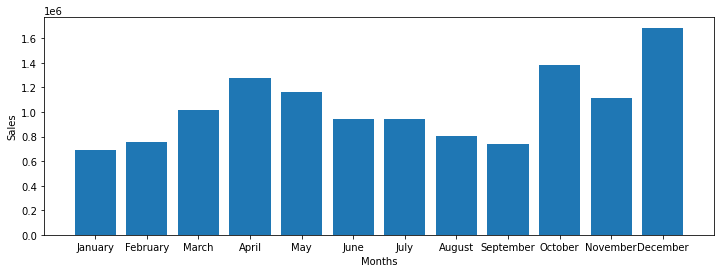

In [12]:
fig,axs = plt.subplots(figsize = (12,4))
plt.bar(monthly_amount['month'], monthly_amount['sales_amount'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

### Yearly Sales

In [13]:
yearly = []

for year in df['year'].unique():
    c = 0 
    for i in df.values:
        if year == (i[8]):
            c += i[10]                                        # adding the total amount collected 
    yearly.append([year,round(c,2)])
    
year_sales = pd.DataFrame(yearly,columns =['year','sales'])
year_sales


,year,sales
0,2019,12525933.04
1,2020,8670.29


### Data visualization | Yearly sales | Pie Chart and Horizontal Bar Graph

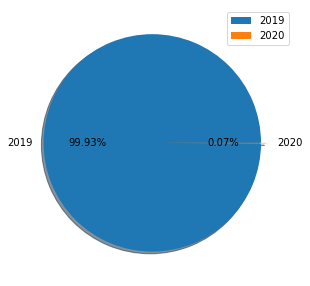

In [14]:
fig,axs = plt.subplots(figsize = (5,5))
plt.pie(year_sales['sales'],labels = year_sales['year'],explode =[0.05,0],shadow = True,autopct = '%1.2f%%')
plt.legend()
plt.show()

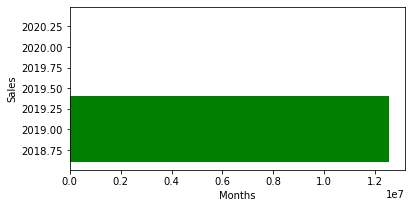

In [15]:
fig,axs = plt.subplots(figsize = (6,3))
plt.barh(year_sales['year'], year_sales['sales'],color = ['green','black'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

### Sales per hour 

In [28]:
hourly = []

for hour in df['hour'].unique():
    c = 0
    for i in df.values:
        if hour == i[9]:
            c += i[10]
    hourly.append([hour,round(c,2)])
    
hour = pd.DataFrame(hourly,columns = ['hours','sales'])
hour = hour.sort_values(by = 'hours',ascending = True)
hours = []
for i in hour['hours']:
    hours.append(str(i))                                   # converting to string 
hour['hours'] = hours
hour
    

,hours,sales
3,0,713721.27
9,1,460866.88
8,2,234851.44
11,3,145757.89
12,4,162661.01
10,5,230679.82
6,6,448113.00
0,7,744854.12
4,8,1192348.97
7,9,1639030.58


### Data visualization | Hourly sales | Horizontal Bar Graph

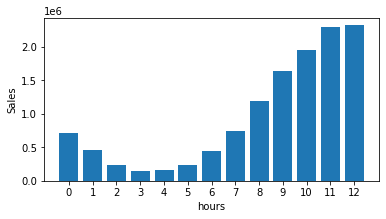

In [46]:
fig,axs = plt.subplots(figsize = (6,3))
plt.bar(hour['hours'], hour['sales'])
plt.xlabel('hours')
plt.ylabel('Sales')
plt.show()

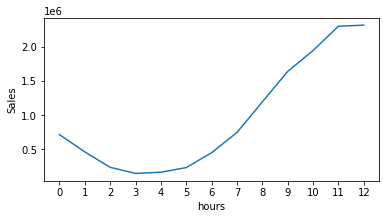

In [47]:
fig,axs = plt.subplots(figsize = (6,3))
plt.plot(hour['hours'], hour['sales'])
plt.xlabel('hours')
plt.ylabel('Sales')
plt.show()

### Product sales

In [49]:
products = []

for prod in df['product'].unique():
    c = 0
    for i in df.values:
        if (prod) == i[1]:
            c += 1
    products.append([prod,c])

product = pd.DataFrame(products,columns = ['Product_name','total'])
product


,Product_name,total
0,20in Monitor,1544
1,AA Batteries (4-pack),7407
2,USB-C Charging Cable,8103
3,AAA Batteries (4-pack),7563
4,Lightning Charging Cable,7913
5,Wired Headphones,6877
6,Apple Airpods Headphones,5769
7,ThinkPad Laptop,1491
8,Bose SoundSport Headphones,4875
9,Flatscreen TV,1776


### Data visualization | Product | Pie Chart and Horizontal Bar Graph

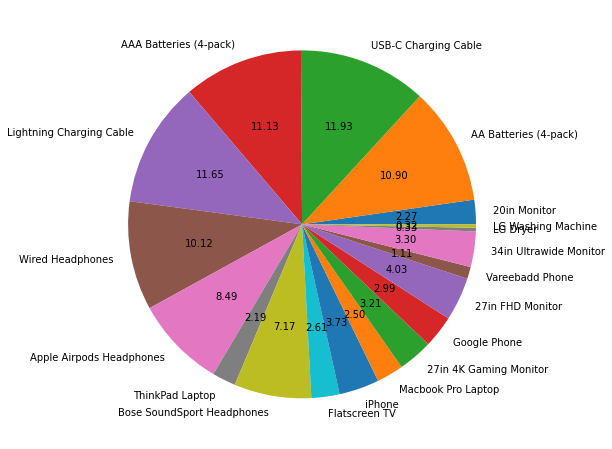

In [52]:
fig,ax = plt.subplots(figsize = (8,8))
plt.pie(product['total'],labels = product['Product_name'],autopct = '%1.2f')
plt.show()

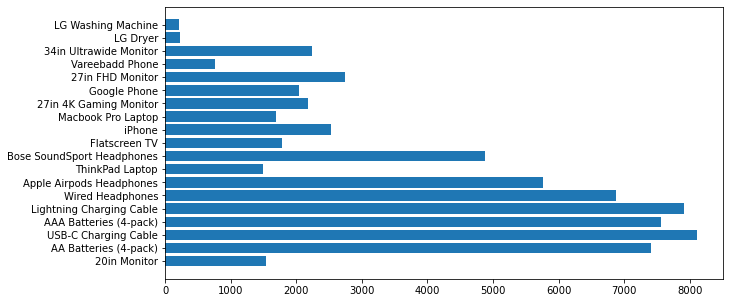

In [51]:
fig,axs = plt.subplots(figsize =(10,5))
plt.barh(product['Product_name'],product['total'])
plt.show()

# Reading the file (PM.csv)

In [54]:
df = pd.read_csv('PM.csv')
df.head()

,order_id,product,quantity,price,address,month,day,month_,year,hour,tot_amt,shop_no,street,city,city_code,pincode,time_
0,236670,Wired Headphones,2,11.99,"359 Spruce St, Seattle, WA 98101",August,31,8,2019,22,23.98,359,Spruce St,Seattle,WA,98101,P.M.
1,236671,Bose SoundSport Headphones,1,99.99,"492 Ridge St, Dallas, TX 75001",August,15,8,2019,15,99.99,492,Ridge St,Dallas,TX,75001,P.M.
2,236672,iPhone,1,700.00,"149 7th St, Portland, OR 97035",August,6,8,2019,14,700.00,149,7th St,Portland,OR,97035,P.M.
3,236673,AA Batteries (4-pack),2,3.84,"631 2nd St, Los Angeles, CA 90001",August,29,8,2019,20,7.68,631,2nd St,Los Angeles,CA,90001,P.M.
4,236674,AA Batteries (4-pack),2,3.84,"736 14th St, New York City, NY 10001",August,15,8,2019,19,7.68,736,14th St,New York City,NY,10001,P.M.


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118002 entries, 0 to 118001
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_id   118002 non-null  int64  
 1   product    118002 non-null  object 
 2   quantity   118002 non-null  int64  
 3   price      118002 non-null  float64
 4   address    118002 non-null  object 
 5   month      118002 non-null  object 
 6   day        118002 non-null  int64  
 7   month_     118002 non-null  int64  
 8   year       118002 non-null  int64  
 9   hour       118002 non-null  int64  
 10  tot_amt    118002 non-null  float64
 11  shop_no    118002 non-null  int64  
 12  street     118002 non-null  object 
 13  city       118002 non-null  object 
 14  city_code  118002 non-null  object 
 15  pincode    118002 non-null  int64  
 16  time_      118002 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 15.3+ MB


In [57]:
df.describe()

,order_id,quantity,price,day,month_,year,hour,tot_amt,shop_no,pincode
count,118002.000000,118002.000000,118002.000000,118002.000000,118002.000000,118002.0,118002.000000,118002.000000,118002.000000,118002.000000
mean,230506.036152,1.123515,184.994066,15.747089,7.066295,2019.0,17.745886,186.076784,499.871561,63851.394307
std,51507.242404,0.439786,333.682284,8.798591,3.502307,0.0,3.016175,333.829955,289.033528,37796.349544
min,141234.000000,1.000000,2.990000,1.000000,1.000000,2019.0,13.000000,2.990000,1.000000,2215.000000
25%,185889.500000,1.000000,11.950000,8.000000,4.000000,2019.0,15.000000,11.950000,249.000000,10001.000000
50%,230484.500000,1.000000,14.950000,16.000000,7.000000,2019.0,18.000000,14.950000,501.000000,90001.000000
75%,275247.750000,1.000000,150.000000,23.000000,10.000000,2019.0,20.000000,150.000000,751.000000,94016.000000
max,319670.000000,9.000000,1700.000000,31.000000,12.000000,2019.0,23.000000,3400.000000,999.000000,98101.000000


In [59]:
df.isnull().sum()

order_id     0
product      0
quantity     0
price        0
address      0
month        0
day          0
month_       0
year         0
hour         0
tot_amt      0
shop_no      0
street       0
city         0
city_code    0
pincode      0
time_        0
dtype: int64

In [60]:
df.head()

,order_id,product,quantity,price,address,month,day,month_,year,hour,tot_amt,shop_no,street,city,city_code,pincode,time_
0,236670,Wired Headphones,2,11.99,"359 Spruce St, Seattle, WA 98101",August,31,8,2019,22,23.98,359,Spruce St,Seattle,WA,98101,P.M.
1,236671,Bose SoundSport Headphones,1,99.99,"492 Ridge St, Dallas, TX 75001",August,15,8,2019,15,99.99,492,Ridge St,Dallas,TX,75001,P.M.
2,236672,iPhone,1,700.00,"149 7th St, Portland, OR 97035",August,6,8,2019,14,700.00,149,7th St,Portland,OR,97035,P.M.
3,236673,AA Batteries (4-pack),2,3.84,"631 2nd St, Los Angeles, CA 90001",August,29,8,2019,20,7.68,631,2nd St,Los Angeles,CA,90001,P.M.
4,236674,AA Batteries (4-pack),2,3.84,"736 14th St, New York City, NY 10001",August,15,8,2019,19,7.68,736,14th St,New York City,NY,10001,P.M.


## Which pincode has the maximum orders (valid pincodes)

In [61]:
pins = []
for i in df['pincode'].unique():
    if len(str(i)) == 5 :
        pins.append(i)
        
        

orders_del = []
for pin in pins:
    c = 0
    for pincodes in df['pincode']:
        if pin == pincodes:
            c += 1
    orders_del.append([pin,c])
    
    
orders = pd.DataFrame(orders_del,columns = ['pincode','order_count'])
orders.sort_values(by = 'order_count',ascending = False)

,pincode,order_count
5,94016,28315
3,90001,18790
4,10001,15767
1,75001,9476
6,30301,9430
0,98101,9366
2,97035,6384
7,73301,6200


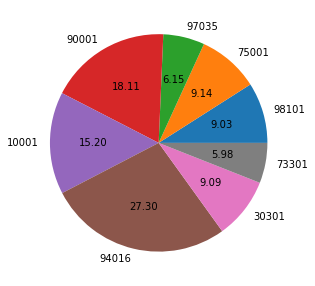

In [62]:
fig,axs = plt.subplots(figsize = (5,5))
plt.pie(orders['order_count'],labels = orders['pincode'],autopct = '%1.2f')
plt.show()

## Monthly Sales (monthly amount collected)

In [63]:
## Direct method                      ---- > (Data is structured)
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# indirect method                     ----> (data is unstructured)
# for i in df['month'].unique():
#     months.append(i)
    
monthly = []
for month in months:
    c = 0 
    for i in df.values:
        if month == i[5]:
            c += i[10]
    monthly.append([month,round(c,2)])   

monthly_amount = pd.DataFrame(monthly,columns =['month','sales_amount'])
monthly_amount
    

,month,sales_amount
0,January,1121392.53
1,February,1444908.98
2,March,1792649.64
3,April,2118673.35
4,May,1978779.00
5,June,1633475.00
6,July,1701050.61
7,August,1436055.51
8,September,1360620.96
9,October,2351928.75


### Data visualization | Monthly sales | Pie Chart ,line Graph and Bar Graph

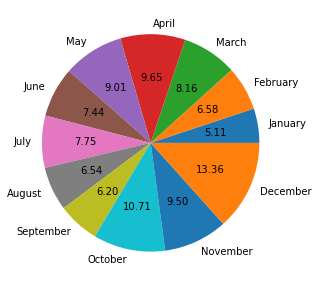

In [64]:
fig,axs = plt.subplots(figsize = (5,5))
plt.pie(monthly_amount['sales_amount'],labels = monthly_amount['month'],autopct = '%1.2f')
plt.show()

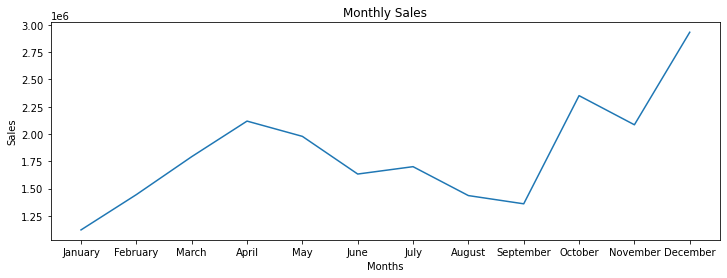

In [65]:
fig,axs = plt.subplots(figsize = (12,4))
plt.plot(monthly_amount['month'], monthly_amount['sales_amount'])
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

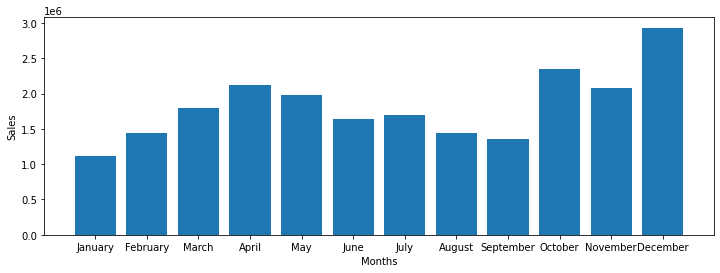

In [66]:
fig,axs = plt.subplots(figsize = (12,4))
plt.bar(monthly_amount['month'], monthly_amount['sales_amount'])
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

## Sales per hour 

In [68]:
hourly = []

for hour in df['hour'].unique():
    c = 0
    for i in df.values:
        if hour == i[9]:
            c += i[10]
    hourly.append([hour,round(c,2)])
    
hour = pd.DataFrame(hourly,columns = ['hours','sales'])
hour = hour.sort_values(by = 'hours',ascending = True)
hours = []
for i in hour['hours']:
    hours.append(str(i))
hour['hours'] = hours
hour
    

,hours,sales
7,13,2155389.80
2,14,2083672.73
1,15,1941549.60
6,16,1904601.31
9,17,2129361.61
10,18,2219348.30
4,19,2412938.54
3,20,2281716.24
8,21,2042000.86
0,22,1607549.21


### Data visualization | Hourly sales | Horizontal Bar Graph

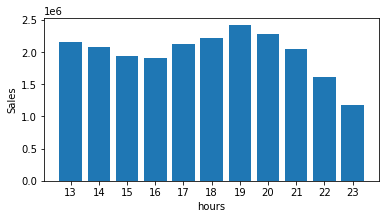

In [69]:
fig,axs = plt.subplots(figsize = (6,3))
plt.bar(hour['hours'], hour['sales'])
plt.xlabel('hours')
plt.ylabel('Sales')
plt.show()

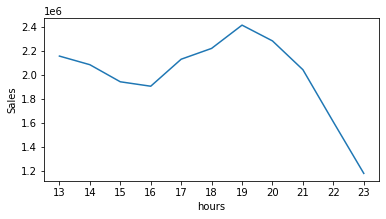

In [70]:
fig,axs = plt.subplots(figsize = (6,3))
plt.plot(hour['hours'], hour['sales'])
plt.xlabel('hours')
plt.ylabel('Sales')
plt.show()

## Product sales

In [71]:
products = []

for prod in df['product'].unique():
    c = 0
    for i in df.values:
        if (prod) == i[1]:
            c += 1
    products.append([prod,c])

product = pd.DataFrame(products,columns = ['Product_name','total'])
product


,Product_name,total
0,Wired Headphones,12005
1,Bose SoundSport Headphones,8450
2,iPhone,4305
3,AA Batteries (4-pack),13170
4,34in Ultrawide Monitor,3941
5,Macbook Pro Laptop,3026
6,LG Washing Machine,450
7,27in FHD Monitor,4767
8,Lightning Charging Cable,13745
9,Apple Airpods Headphones,9780


### Data visualization | Product | Pie Chart and Horizontal Bar Graph

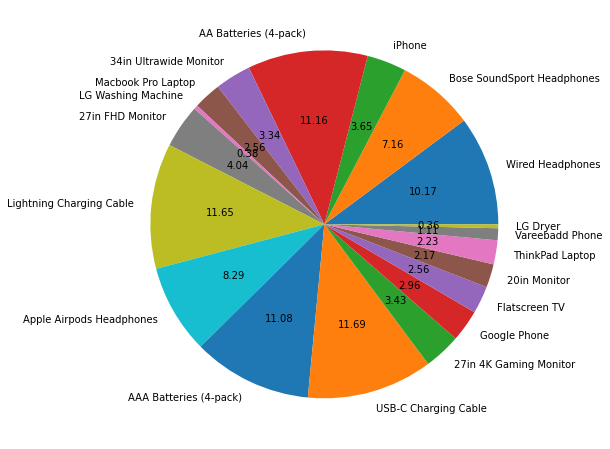

In [72]:
fig,ax = plt.subplots(figsize = (8,8))
plt.pie(product['total'],labels = product['Product_name'],autopct = '%1.2f')
plt.show()

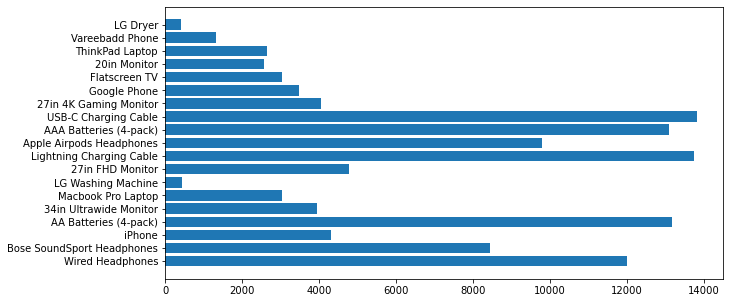

In [73]:
fig,axs = plt.subplots(figsize =(10,5))
plt.barh(product['Product_name'],product['total'])
plt.show()